In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
bank_account_df = pd.read_excel(file_path, sheet_name='account_products')
bank_account_df = bank_account_df.applymap(lambda x: None if pd.isna(x) else x)
bank_account_df.head(5)

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_30468\2150917869.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bank_account_df = bank_account_df.applymap(lambda x: None if pd.isna(x) else x)


,Unnamed: 0,account product,bank,url - bank product information
0,1,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones
1,2,Cuenta Online Sabadell,Banc Sabadell,bancsabadell.com/cuenta-online
2,3,Cuenta Clara Abanca,ABANCA,abanca.com/es/cuentas/cuenta-online
3,4,Cuenta Inteligente Bienvenida Evo,EVO Banco,evobanco.com/cuenta-inteligente/
4,5,Cuenta No Cuenta,ING,ing.es/cuenta-nocuenta-ing


In [4]:
bank_account_df.drop(columns=['Unnamed: 0'],inplace= True)
bank_account_df.rename(columns={'url - bank product information':'URL'},inplace=True)
print(bank_account_df.head(3))

          account product           bank                                  URL
0              Cuenta N26            N26  n26.com/es-es/cuenta-sin-comisiones
1  Cuenta Online Sabadell  Banc Sabadell       bancsabadell.com/cuenta-online
2     Cuenta Clara Abanca         ABANCA  abanca.com/es/cuentas/cuenta-online


In [5]:
file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
account_condition_df = pd.read_excel(file_path, sheet_name='account_conditions',skiprows=1)
account_condition_df = account_condition_df.applymap(lambda x: None if pd.isna(x) else x)
account_condition_df.head(5)

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_30468\3454013134.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  account_condition_df = account_condition_df.applymap(lambda x: None if pd.isna(x) else x)


,date,Account for:,Currency,Source of income,Maximum number of account holders,Country of license,Allows opening accounts in other currencies,Allows cryptocurrency operations,Summary of opinions,Account type,...,Physical payment systems,Benefits,TAE comment,Gasoline discount with card,Card purchase refunds,Direct debit refunds,Service improvement,Interest payments,Free insurance with card,TAE
0,2024-01-01,Particulares,Euro,None,2 personas Como máximo se podrá tener 2 titula...,España,None,None,\n Sus regalos por domiciliar una nómina Su at...,Cuenta corriente,...,Tarjetas,Sí Cuenta joven sin comisiones . Sin gastos de...,None,Sí 2% en estaciones de servicio Galp,Sí Descuentos Privilegios Euro6000,None,None,None,None,None
1,2024-01-01,Particulares,Euro,Nómina,1 persona,None,None,None,\n Cuenta sin comisiones Para el día a día y p...,Cuenta corriente,...,Tarjetas,Sí Cuenta gratuita. No tiene gastos de admini...,None,None,None,None,"\n Sí Cuenta N26 Smart : 4,90€/mes \n Cuenta N...",None,None,None
2,2024-01-01,Particulares,None,None,2 personas,None,None,None,None,Cuenta corriente,...,None,Sí Cuenta sin comisiones de mantenimiento ni d...,None,None,None,Sí,None,Mensual,None,"3,00 %"
3,2024-01-01,Particulares,Euro,None,2 personas Cada cliente podrá contratar un máx...,España,None,None,\n Regalo a cambio de domiciliar la nómina Cue...,Cuenta corriente,...,Tarjetas,Sí Cuenta online sin comisiones . Sin gastos d...,None,None,None,None,None,Trimestral,None,"2,00 %"
4,2024-01-01,Particulares,None,None,2 personas,España,None,None,None,Cuenta corriente,...,None,Sí Cuenta sin comisiones de mantenimiento. Ex...,None,None,None,None,Seguro de accidentes incluido en la tarjeta de...,None,None,None


In [6]:
account_condition_df.rename(columns={'Bank      ':'bank','Account name     ':'account product','Minimum age     ':'Minimum Age','Mobile payment     ':'Mobile Payment'}, inplace= True)

account_condition_df = account_condition_df[['bank', 'account product', 'Minimum Age', 'Mobile Payment']]
print(account_condition_df.head(3))

             bank            account product Minimum Age  \
0          ABANCA  Cuenta Clara Joven Abanca     16 años   
1             N26          Cuenta Nómina N26     18 años   
2  Banco Sabadell     Cuenta Online Sabadell     18 años   

                                      Mobile Payment  
0  \n Google pay Apple pay Samsung Pay Bizum Pago...  
1              Bizum  MoneyBeam Google pay Apple pay  
2                                               None  


In [7]:
bank_account_conditions_merged_df = pd.merge(
    bank_account_df, 
    account_condition_df, 
    how='left', 
    on=['bank', 'account product']
)

bank_account_conditions_merged_df = bank_account_conditions_merged_df.applymap(lambda x: None if pd.isna(x) else x)
display(bank_account_conditions_merged_df.loc[bank_account_conditions_merged_df['Mobile Payment'] != None, "Mobile Payment"])

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_30468\1625511716.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bank_account_conditions_merged_df = bank_account_conditions_merged_df.applymap(lambda x: None if pd.isna(x) else x)


0                 Bizum  MoneyBeam Google pay Apple pay
1                                                  None
2     \n Google pay Apple pay Samsung Pay Bizum Pago...
3                                                  None
4                                                  None
5                                                  None
6                                  Google pay Apple pay
7                                                  None
8                                                  None
9                Bizum Google pay Apple pay Samsung Pay
10                Bizum  MoneyBeam Google pay Apple pay
11                                                 None
12                                                 None
Name: Mobile Payment, dtype: object

In [8]:
def expand_payment_methods(row):
    methods = []
    payment_info = row['Mobile Payment']
    if payment_info is not None and not pd.isna(payment_info):
        for method in ["Google pay", "Apple pay", "Samsung Pay", "Bizum"]:
            if method in payment_info:
                new_row = row.copy()
                new_row['Category Mobile Payment'] = method
                methods.append(new_row)
    else:
        new_row = row.copy()
        new_row['Category Mobile Payment'] = None  # Set explicitly to None
        methods.append(new_row)
    
    # If no methods are found, you could return the original row, or modify this logic as needed.
    return methods if methods else [row]

expanded_bank_account_conditions = bank_account_conditions_merged_df.apply(expand_payment_methods, axis=1).explode().reset_index(drop=True)
# Convert the list of series back to a DataFrame
expanded_bank_account_conditions_df = pd.DataFrame(expanded_bank_account_conditions.tolist())

expanded_account_condition = account_condition_df.apply(expand_payment_methods, axis=1).explode().reset_index(drop=True)
expanded_account_condition_df = pd.DataFrame(expanded_account_condition.tolist())


In [22]:
expanded_account_condition_df

,bank,account product,Minimum Age,Mobile Payment,Category Mobile Payment
0,ABANCA,Cuenta Clara Joven Abanca,16 años,\n Google pay Apple pay Samsung Pay Bizum Pago...,Google pay
0,ABANCA,Cuenta Clara Joven Abanca,16 años,\n Google pay Apple pay Samsung Pay Bizum Pago...,Apple pay
0,ABANCA,Cuenta Clara Joven Abanca,16 años,\n Google pay Apple pay Samsung Pay Bizum Pago...,Samsung Pay
0,ABANCA,Cuenta Clara Joven Abanca,16 años,\n Google pay Apple pay Samsung Pay Bizum Pago...,Bizum
1,N26,Cuenta Nómina N26,18 años,Bizum MoneyBeam Google pay Apple pay,Google pay
...,...,...,...,...,...
30,CKV,Cuenta de Ahorro CKV,18 años,None,None
31,TF Bank,Cuenta de Ahorro TF Bank,18 años,None,None
32,BBVA,Cuenta Online para Menores,0 años,None,None
33,Revolut,Cuenta Revolut Junior,6 años,Google pay Apple pay,Google pay


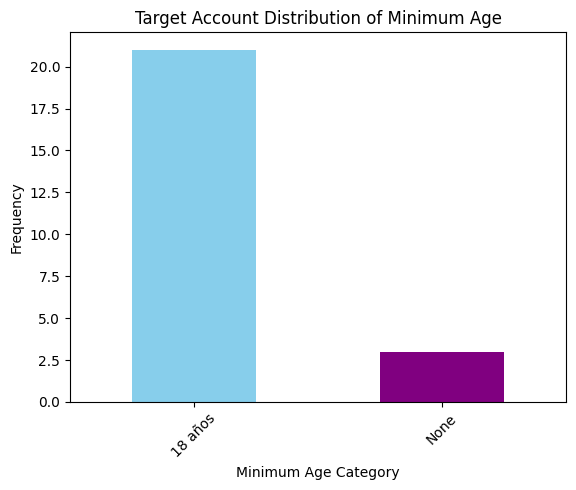

In [10]:
expanded_bank_account_conditions_df['Minimum Age'] = expanded_bank_account_conditions_df['Minimum Age'].fillna('None')
age_category_counts = expanded_bank_account_conditions_df['Minimum Age'].value_counts()

age_category_counts.plot(kind='bar', stacked=True, color = ['skyblue', 'purple', 'lightgreen', 'salmon', 'orange', ])
plt.title('Target Account Distribution of Minimum Age')
plt.xlabel('Minimum Age Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Show the plot
plt.show()

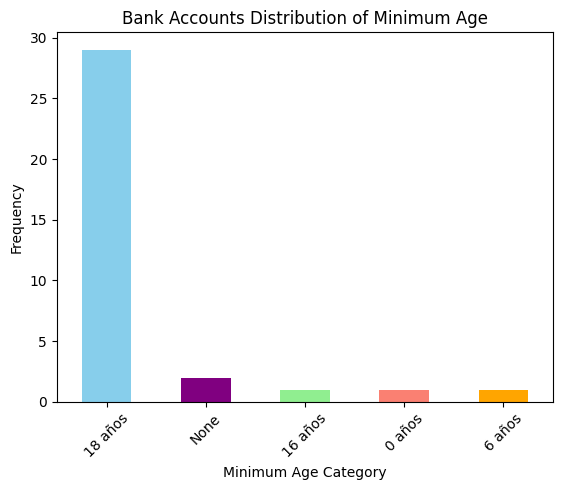

In [11]:
account_condition_df['Minimum Age'] = account_condition_df['Minimum Age'].fillna('None')
age_category_counts =  account_condition_df['Minimum Age'].value_counts()

age_category_counts.plot(kind='bar', stacked=True, color = ['skyblue', 'purple','lightgreen', 'salmon', 'orange', ])
plt.title('Bank Accounts Distribution of Minimum Age')
plt.xlabel('Minimum Age Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Show the plot
plt.show()

Minimum Age      0 años  16 años  18 años  6 años  None
bank                                                   
ABANCA                0        1        2       0     0
BBVA                  1        0        2       0     0
Banca Progetto        0        0        1       0     0
Banco Sabadell        0        0        2       0     0
Banco Santander       0        0        2       0     0
Bank Norwegian        0        0        1       0     0
Bankinter             0        0        1       0     0
CKV                   0        0        1       0     0
Collector             0        0        0       0     1
Distingo Bank         0        0        1       0     0
EVO Banco             0        0        2       0     0
ING                   0        0        2       0     0
Ibercaja              0        0        1       0     0
Klarna                0        0        0       0     1
Lea Bank              0        0        1       0     0
Money Go              0        0        1       

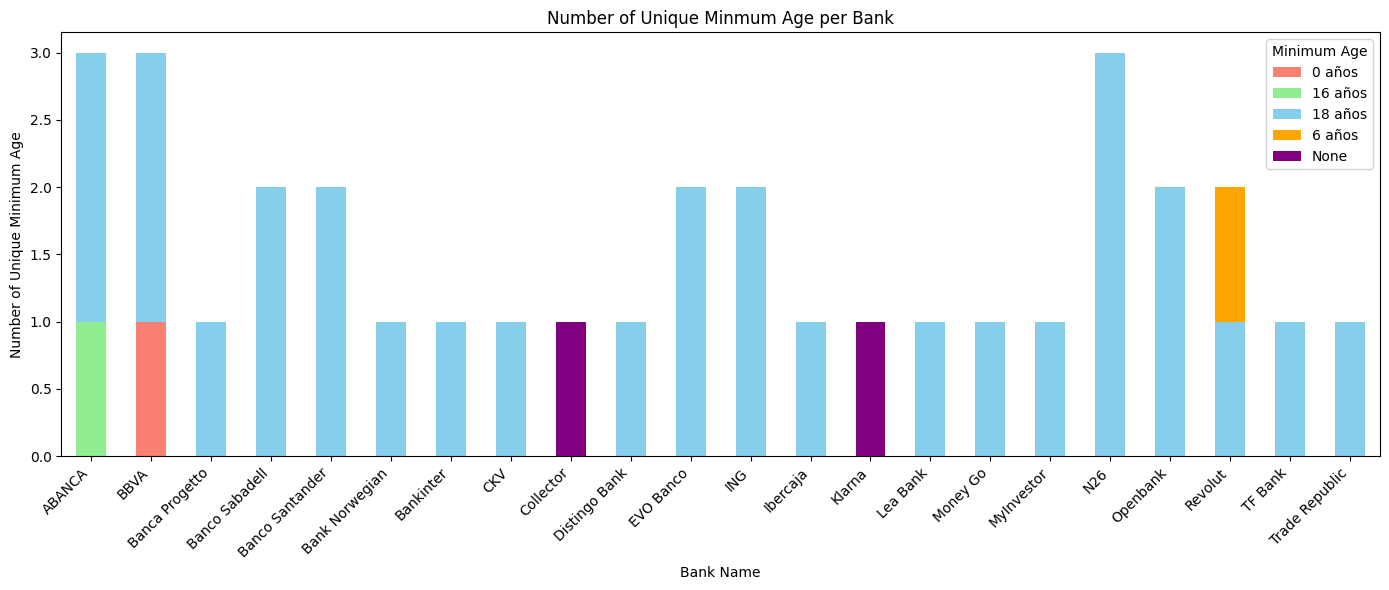

In [12]:
category_counts = account_condition_df.explode('Minimum Age').groupby('bank')['Minimum Age'].value_counts().unstack(fill_value=0)
print(category_counts )

# Plotting the number of unique categories for each bank
category_counts.plot(kind='bar', stacked=True, figsize=(14, 6), color = ['salmon', 'lightgreen','skyblue', 'orange', 'purple'])
plt.title('Number of Unique Minmum Age per Bank')
plt.xlabel('Bank Name')
plt.ylabel('Number of Unique Minimum Age')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### Mobile Payment

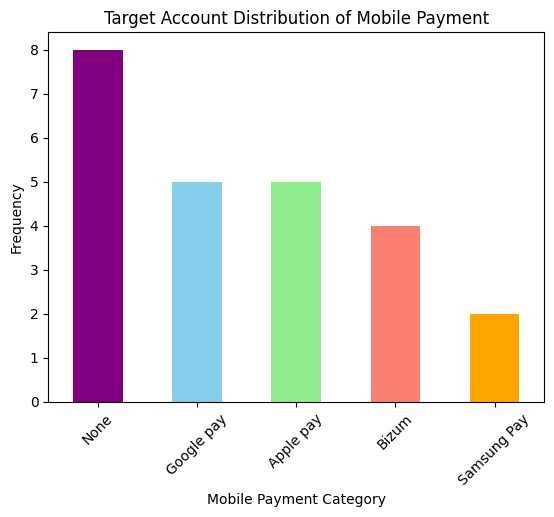

In [26]:
expanded_bank_account_conditions_df['Category Mobile Payment'] = expanded_bank_account_conditions_df['Category Mobile Payment'].fillna('None')
age_category_counts = expanded_bank_account_conditions_df['Category Mobile Payment'].value_counts()

age_category_counts.plot(kind='bar', stacked=True, color = ['purple','skyblue',  'lightgreen','salmon', 'orange',  ])
plt.title('Target Account Distribution of Mobile Payment')
plt.xlabel('Mobile Payment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Show the plot
plt.show()

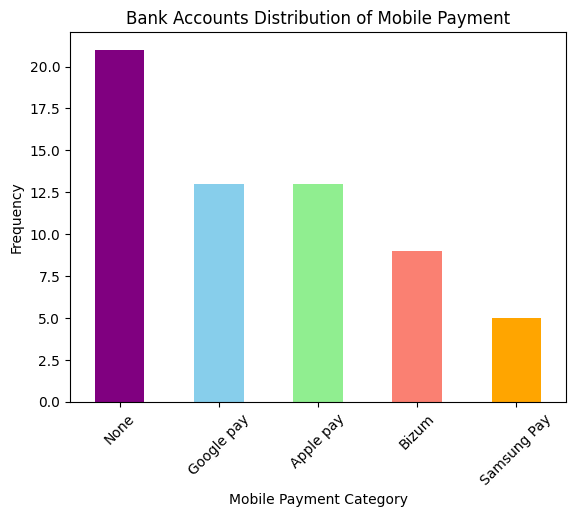

In [27]:
expanded_account_condition_df['Category Mobile Payment'] = expanded_account_condition_df['Category Mobile Payment'].fillna('None')
age_category_counts =  expanded_account_condition_df['Category Mobile Payment'].value_counts()

age_category_counts.plot(kind='bar', stacked=True, color = ['purple','skyblue',  'lightgreen','salmon', 'orange',  ])
plt.title('Bank Accounts Distribution of Mobile Payment')
plt.xlabel('Mobile Payment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Category Mobile Payment  Apple pay  Bizum  Google pay  None  Samsung Pay
bank                                                                    
ABANCA                           3      3           3     0            3
BBVA                             0      0           0     3            0
Banca Progetto                   0      0           0     1            0
Banco Sabadell                   0      0           0     2            0
Banco Santander                  0      0           0     2            0
Bank Norwegian                   1      0           1     0            0
Bankinter                        1      1           1     0            1
CKV                              0      0           0     1            0
Collector                        0      0           0     1            0
Distingo Bank                    0      0           0     1            0
EVO Banco                        0      0           0     2            0
ING                              2      2          

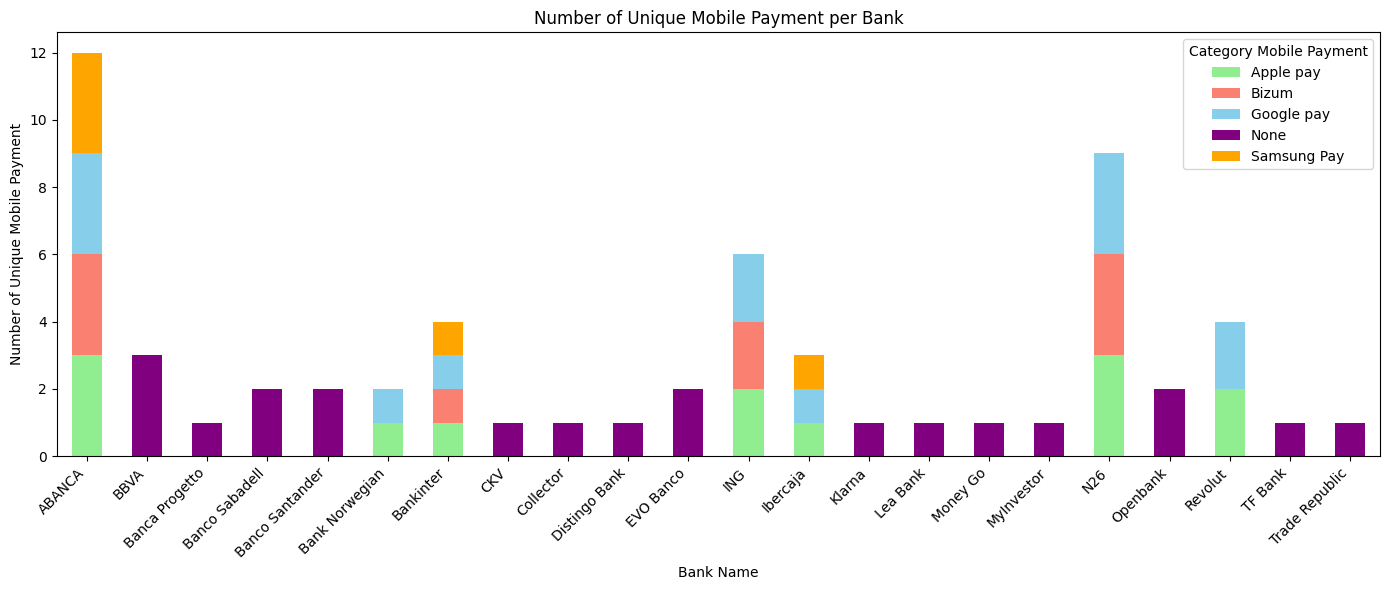

In [30]:
category_counts = expanded_account_condition_df.explode('Category Mobile Payment').groupby('bank')['Category Mobile Payment'].value_counts().unstack(fill_value=0)
print(category_counts )

# Plotting the number of unique categories for each bank
category_counts.plot(kind='bar', stacked=True, figsize=(14, 6), color = ['lightgreen','salmon','skyblue',  'purple','orange',  ])
plt.title('Number of Unique Mobile Payment per Bank')
plt.xlabel('Bank Name')
plt.ylabel('Number of Unique Mobile Payment')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [14]:
file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
web_traffic_df = pd.read_excel(file_path, sheet_name='web_traffic_accounts')
web_traffic_df = web_traffic_df.applymap(lambda x:None if pd.isna(x) else x)
web_traffic_df.head(5)

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_30468\3574403750.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  web_traffic_df = web_traffic_df.applymap(lambda x:None if pd.isna(x) else x)


,Date,abanca.com/es/cuentas/cuenta-online,n26.com/es-es/cuenta-sin-comisiones,bancsabadell.com/cuenta-online,ing.es/cuenta-nocuenta-ing,bbva.es/personas/productos/cuentas/cuenta-online-sin-comisiones.html,revolut.com/es-ES/a-radically-better-account/,openbank.es/cuenta-ahorro-bienvenida,myinvestor.es/cuentas-tarjetas/cuentas,n26.com/es-es/cuenta-ahorro,bankinter.com/banca/cuentas-tarjetas/cuentas/cuenta-nomina,ing.es/cuenta-nocuenta-ing.1,evobanco.com/cuenta-inteligente,bancosantander.es/particulares/cuentas-tarjetas/cuentas-corrientes/cuenta-online-sin-comisiones
0,2021-12-01,15202.983835,6664.368911,NaN,NaN,45449.486787,1343.418328,NaN,5319.608623,NaN,8733.560835,NaN,5055.542564,22325.885971
1,2022-01-01,42183.913207,5310.177360,NaN,NaN,38306.464983,1531.016801,NaN,6577.851993,NaN,11410.593443,NaN,4539.012047,28331.245044
2,2022-02-01,34498.153115,5547.588971,NaN,NaN,40978.325821,1304.591257,NaN,4031.716960,NaN,8891.661053,NaN,6049.457905,23798.819170
3,2022-03-01,34546.319021,4900.271300,NaN,NaN,43970.545627,1105.180575,NaN,4941.009311,NaN,7446.925144,NaN,9826.193608,24808.561729
4,2022-04-01,40508.288420,4909.581023,NaN,NaN,40782.451956,1020.968713,NaN,5774.734455,NaN,10285.861726,NaN,5028.236254,24739.758729


In [15]:
web_traffic_df = web_traffic_df.reset_index(drop=True)
# Melting the DataFrame
long_web_traffic_df = web_traffic_df.melt(id_vars=['Date'], var_name='URL', value_name='Web Traffic')


# Ensure no 'index' labels incorrectly positioned
print(long_web_traffic_df.head(5))

        Date                                  URL   Web Traffic
0 2021-12-01  abanca.com/es/cuentas/cuenta-online  15202.983835
1 2022-01-01  abanca.com/es/cuentas/cuenta-online  42183.913207
2 2022-02-01  abanca.com/es/cuentas/cuenta-online  34498.153115
3 2022-03-01  abanca.com/es/cuentas/cuenta-online  34546.319021
4 2022-04-01  abanca.com/es/cuentas/cuenta-online  40508.288420
